In [1]:
import pymongo
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.patches import Patch

MONGO_HOST = "localhost"
MONGO_PORT = 27017

mongo_connection = pymongo.MongoClient("mongodb://"+MONGO_HOST+":"+str(MONGO_PORT), maxPoolSize=None)

### Arbitrage

In [2]:
ethereum_arbitrage_txs = mongo_connection["ethereum"]["mev_arbitrage_results"].count_documents({})
ethereum_arbitrage_flash_loan_txs = 0
ethereum_arbitrage_flash_loan_platforms = {
    "Aave": 0,
    "Balancer": 0,
}
cursor = mongo_connection["ethereum"]["mev_arbitrage_results"].find({"flash_loans": {"$exists": True, "$ne": []}})
for document in cursor:
    for flash_loan in document["flash_loans"]:
        if flash_loan["platform_name"].startswith("Aave"):
            ethereum_arbitrage_flash_loan_txs += 1
            ethereum_arbitrage_flash_loan_platforms["Aave"] += 1
        if flash_loan["platform_name"] in ["Balancer"]:
            ethereum_arbitrage_flash_loan_txs += 1
            ethereum_arbitrage_flash_loan_platforms["Balancer"] += 1

In [3]:
print("Number of arbitrage transactions on Ethereum:", ethereum_arbitrage_txs)
print("Number of arbitrage transactions on Ethereum with flash loans:", ethereum_arbitrage_flash_loan_txs)
print("Number of arbitrage transactions on Ethereum with Aave flash loans:", ethereum_arbitrage_flash_loan_platforms["Aave"])
print("Number of arbitrage transactions on Ethereum with Balancer flash loans:", ethereum_arbitrage_flash_loan_platforms["Balancer"])

Number of arbitrage transactions on Ethereum: 2901740
Number of arbitrage transactions on Ethereum with flash loans: 6663
Number of arbitrage transactions on Ethereum with Aave flash loans: 2164
Number of arbitrage transactions on Ethereum with Balancer flash loans: 4499


In [4]:
arbitrum_arbitrage_txs = mongo_connection["arbitrum"]["mev_arbitrage_results"].count_documents({})
arbitrum_arbitrage_flash_loan_txs = 0
arbitrum_arbitrage_flash_loan_platforms = {
    "Aave": 0,
    "Balancer": 0,
}
cursor = mongo_connection["arbitrum"]["mev_arbitrage_results"].find({"flash_loans": {"$exists": True, "$ne": []}})
for document in cursor:
    for flash_loan in document["flash_loans"]:
        if flash_loan["platform_name"].startswith("Aave"):
            arbitrum_arbitrage_flash_loan_txs += 1
            arbitrum_arbitrage_flash_loan_platforms["Aave"] += 1
        if flash_loan["platform_name"] in ["Balancer"]:
            arbitrum_arbitrage_flash_loan_txs += 1
            arbitrum_arbitrage_flash_loan_platforms["Balancer"] += 1

In [5]:
print("Number of arbitrage transactions on Arbitrum:", arbitrum_arbitrage_txs)
print("Number of arbitrage transactions on Arbitrum with flash loans:", arbitrum_arbitrage_flash_loan_txs)
print("Number of arbitrage transactions on Arbitrum with Aave flash loans:", arbitrum_arbitrage_flash_loan_platforms["Aave"])
print("Number of arbitrage transactions on Arbitrum with Balancer flash loans:", arbitrum_arbitrage_flash_loan_platforms["Balancer"])

Number of arbitrage transactions on Arbitrum: 1746083
Number of arbitrage transactions on Arbitrum with flash loans: 117187
Number of arbitrage transactions on Arbitrum with Aave flash loans: 3692
Number of arbitrage transactions on Arbitrum with Balancer flash loans: 113495


In [6]:
optimism_arbitrage_txs = mongo_connection["optimism"]["mev_arbitrage_results"].count_documents({})
optimism_arbitrage_flash_loan_txs = 0
optimism_arbitrage_flash_loan_platforms = {
    "Aave": 0,
    "Balancer": 0,
}
cursor = mongo_connection["optimism"]["mev_arbitrage_results"].find({"flash_loans": {"$exists": True, "$ne": []}})
for document in cursor:
    for flash_loan in document["flash_loans"]:
        if flash_loan["platform_name"].startswith("Aave"):
            optimism_arbitrage_flash_loan_txs += 1
            optimism_arbitrage_flash_loan_platforms["Aave"] += 1
        if flash_loan["platform_name"] in ["Balancer"]:
            optimism_arbitrage_flash_loan_txs += 1
            optimism_arbitrage_flash_loan_platforms["Balancer"] += 1

In [7]:
print("Number of arbitrage transactions on Optimism:", optimism_arbitrage_txs)
print("Number of arbitrage transactions on Optimism with flash loans:", optimism_arbitrage_flash_loan_txs)
print("Number of arbitrage transactions on Optimism with Aave flash loans:", optimism_arbitrage_flash_loan_platforms["Aave"])
print("Number of arbitrage transactions on Optimism with Balancer flash loans:", optimism_arbitrage_flash_loan_platforms["Balancer"])

Number of arbitrage transactions on Optimism: 1153366
Number of arbitrage transactions on Optimism with flash loans: 152499
Number of arbitrage transactions on Optimism with Aave flash loans: 311
Number of arbitrage transactions on Optimism with Balancer flash loans: 152188


In [8]:
zksync_arbitrage_txs = mongo_connection["zksync"]["mev_arbitrage_results"].count_documents({})
zksync_arbitrage_flash_loan_txs = 0
zksync_arbitrage_flash_loan_platforms = {
    "Aave": 0,
    "Balancer": 0,
}
cursor = mongo_connection["zksync"]["mev_arbitrage_results"].find({"flash_loans": {"$exists": True, "$ne": []}})
for document in cursor:
    for flash_loan in document["flash_loans"]:
        if flash_loan["platform_name"].startswith("Aave"):
            zksync_arbitrage_flash_loan_txs += 1
            zksync_arbitrage_flash_loan_platforms["Aave"] += 1
        if flash_loan["platform_name"] in ["Balancer"]:
            zksync_arbitrage_flash_loan_txs += 1
            zksync_arbitrage_flash_loan_platforms["Balancer"] += 1

In [9]:
print("Number of arbitrage transactions on zkSync:", zksync_arbitrage_txs)
print("Number of arbitrage transactions on zkSync with flash loans:", zksync_arbitrage_flash_loan_txs)
print("Number of arbitrage transactions on zkSync with Aave flash loans:", zksync_arbitrage_flash_loan_platforms["Aave"])
print("Number of arbitrage transactions on zkSync with Balancer flash loans:", zksync_arbitrage_flash_loan_platforms["Balancer"])

Number of arbitrage transactions on zkSync: 108070
Number of arbitrage transactions on zkSync with flash loans: 0
Number of arbitrage transactions on zkSync with Aave flash loans: 0
Number of arbitrage transactions on zkSync with Balancer flash loans: 0


### Liquidation

In [10]:
ethereum_liquidation_txs = mongo_connection["ethereum"]["mev_liquidation_results"].count_documents({})
ethereum_liquidation_flash_loan_txs = 0
ethereum_liquidation_flash_loan_platforms = {
    "Aave": 0,
    "Balancer": 0,
}
cursor = mongo_connection["ethereum"]["mev_liquidation_results"].find({"liquidations.flash_loan": {"$ne": None}})
for document in cursor:
    for liquidation in document["liquidations"]:
        if liquidation["flash_loan"]["platform_name"].startswith("Aave"):
            ethereum_liquidation_flash_loan_txs += 1
            ethereum_liquidation_flash_loan_platforms["Aave"] += 1
        if liquidation["flash_loan"]["platform_name"] in ["Balancer"]:
            ethereum_liquidation_flash_loan_txs += 1
            ethereum_liquidation_flash_loan_platforms["Balancer"] += 1

In [11]:
print("Number of liquidation transactions on Ethereum:", ethereum_liquidation_txs)
print("Number of liquidation transactions on Ethereum with flash loans:", ethereum_liquidation_flash_loan_txs)
print("Number of liquidation transactions on Ethereum with Aave flash loans:", ethereum_liquidation_flash_loan_platforms["Aave"])
print("Number of liquidation transactions on Ethereum with Balancer flash loans:", ethereum_liquidation_flash_loan_platforms["Balancer"])

Number of liquidation transactions on Ethereum: 54772
Number of liquidation transactions on Ethereum with flash loans: 3089
Number of liquidation transactions on Ethereum with Aave flash loans: 2640
Number of liquidation transactions on Ethereum with Balancer flash loans: 449


In [12]:
arbitrum_liquidation_txs = mongo_connection["arbitrum"]["mev_liquidation_results"].count_documents({})
arbitrum_liquidation_flash_loan_txs = 0
arbitrum_liquidation_flash_loan_platforms = {
    "Aave": 0,
    "Balancer": 0
}
cursor = mongo_connection["arbitrum"]["mev_liquidation_results"].find({"liquidations.flash_loan": {"$ne": None}})
for document in cursor:
    for liquidation in document["liquidations"]:
        if liquidation["flash_loan"]["platform_name"] in ["Aave", "Radiant"]:
            arbitrum_liquidation_flash_loan_platforms["Aave"] += 1
            arbitrum_liquidation_flash_loan_txs += 1
        if liquidation["flash_loan"]["platform_name"] in ["Balancer"]:
            arbitrum_liquidation_flash_loan_platforms["Balancer"] += 1
            arbitrum_liquidation_flash_loan_txs += 1

In [13]:
print("Number of liquidation transactions on Arbitrum:", arbitrum_liquidation_txs)
print("Number of liquidation transactions on Arbitrum with flash loans:", arbitrum_liquidation_flash_loan_txs)
print("Number of liquidation transactions on Arbitrum with Aave flash loans:", arbitrum_liquidation_flash_loan_platforms["Aave"])
print("Number of liquidation transactions on Arbitrum with Balancer flash loans:", arbitrum_liquidation_flash_loan_platforms["Balancer"])

Number of liquidation transactions on Arbitrum: 5277
Number of liquidation transactions on Arbitrum with flash loans: 2583
Number of liquidation transactions on Arbitrum with Aave flash loans: 2099
Number of liquidation transactions on Arbitrum with Balancer flash loans: 484


In [14]:
optimism_liquidation_txs = mongo_connection["optimism"]["mev_liquidation_results"].count_documents({})
optimism_liquidation_flash_loan_txs = 0
optimism_liquidation_flash_loan_platforms = {
    "Aave": 0,
    "Balancer": 0
}
cursor = mongo_connection["optimism"]["mev_liquidation_results"].find({"liquidations.flash_loan": {"$ne": None}})
for document in cursor:
    for liquidation in document["liquidations"]:
        if liquidation["flash_loan"]["platform_name"] in ["Aave"]:
            optimism_liquidation_flash_loan_platforms["Aave"] += 1
            optimism_liquidation_flash_loan_txs += 1
        if liquidation["flash_loan"]["platform_name"] in ["Balancer"]:
            optimism_liquidation_flash_loan_platforms["Balancer"] += 1
            optimism_liquidation_flash_loan_txs += 1

In [15]:
print("Number of liquidation transactions on Optimism:", optimism_liquidation_txs)
print("Number of liquidation transactions on Optimism with flash loans:", optimism_liquidation_flash_loan_txs)
print("Number of liquidation transactions on Optimism with Aave flash loans:", optimism_liquidation_flash_loan_platforms["Aave"])
print("Number of liquidation transactions on Optimism with Balancer flash loans:", optimism_liquidation_flash_loan_platforms["Balancer"])

Number of liquidation transactions on Optimism: 5347
Number of liquidation transactions on Optimism with flash loans: 3152
Number of liquidation transactions on Optimism with Aave flash loans: 2373
Number of liquidation transactions on Optimism with Balancer flash loans: 779


In [16]:
zksync_liquidation_txs = mongo_connection["zksync"]["mev_liquidation_results"].count_documents({})
zksync_liquidation_flash_loan_txs = 0
zksync_liquidation_flash_loan_platforms = {
    "Aave": 0,
    "Balancer": 0
}
cursor = mongo_connection["zksync"]["mev_liquidation_results"].find({"liquidations.flash_loan": {"$ne": None}})
for document in cursor:
    zksync_liquidation_txs += 1
    for liquidation in document["liquidations"]:
        if liquidation["flash_loan"]:
            if liquidation["flash_loan"]["platform_name"] in ["Aave"]:
                zksync_liquidation_flash_loan_platforms["Aave"] += 1
                zksync_liquidation_flash_loan_txs += 1
            if liquidation["flash_loan"]["platform_name"] in ["Balancer"]:
                zksync_liquidation_flash_loan_platforms["Balancer"] += 1
                zksync_liquidation_flash_loan_txs += 1

In [17]:
print("Number of liquidation transactions on zkSync:", zksync_liquidation_txs)
print("Number of liquidation transactions on zkSync with flash loans:", zksync_liquidation_flash_loan_txs)
print("Number of liquidation transactions on zkSync with Aave flash loans:", zksync_liquidation_flash_loan_platforms["Aave"])
print("Number of liquidation transactions on zkSync with Balancer flash loans:", zksync_liquidation_flash_loan_platforms["Balancer"])

Number of liquidation transactions on zkSync: 422
Number of liquidation transactions on zkSync with flash loans: 97
Number of liquidation transactions on zkSync with Aave flash loans: 10
Number of liquidation transactions on zkSync with Balancer flash loans: 87


### Plot

Arbitrages (Percentrage):
Balancer: 		 [0.07457594 0.2114447  0.02696455 0.        ]
Aave: 			 [ 0.1550449   6.49997738 13.19511759  0.        ]
No/Other Flash Loans: 	 [ 99.77037915  93.28857792  86.77791785 100.        ]

Liquidations (Percentrage):
Aave: 		 [ 4.81998101 39.7763881  44.38002618  2.36966825]
Balancer: 			 [ 0.81976192  9.17187796 14.56891715 20.61611374]
No/Other Flash Loans: 	 [94.36025707 51.05173394 41.05105667 77.01421801]


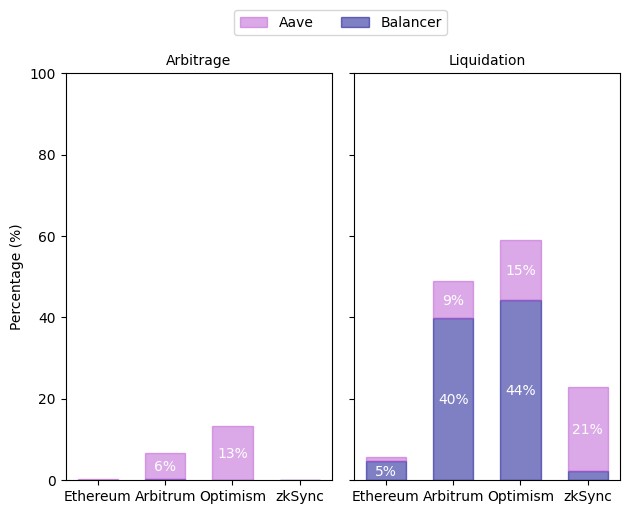

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharey=True)
    
x = ['Ethereum', 'Arbitrum', 'Optimism', 'zkSync']

y1_arbitrages = np.array([
    ethereum_arbitrage_flash_loan_platforms["Aave"]/ethereum_arbitrage_txs*100.0, 
    arbitrum_arbitrage_flash_loan_platforms["Aave"]/arbitrum_arbitrage_txs*100.0, 
    optimism_arbitrage_flash_loan_platforms["Aave"]/optimism_arbitrage_txs*100.0, 
    zksync_arbitrage_flash_loan_platforms["Aave"]/zksync_arbitrage_txs*100.0
])
y2_arbitrages = np.array([
    
    ethereum_arbitrage_flash_loan_platforms["Balancer"]/ethereum_arbitrage_txs*100.0, 
    arbitrum_arbitrage_flash_loan_platforms["Balancer"]/arbitrum_arbitrage_txs*100.0, 
    optimism_arbitrage_flash_loan_platforms["Balancer"]/optimism_arbitrage_txs*100.0, 
    zksync_arbitrage_flash_loan_platforms["Balancer"]/zksync_arbitrage_txs*100.0
])

y3_arbitrages = 100 - (y1_arbitrages + y2_arbitrages)
print("Arbitrages (Percentrage):")
print("Balancer:", "\t\t", y1_arbitrages)
print("Aave:", "\t\t\t", y2_arbitrages)
print("No/Other Flash Loans:", "\t", y3_arbitrages)
print()
y1_liquidations = np.array([
    ethereum_liquidation_flash_loan_platforms["Aave"]/ethereum_liquidation_txs*100.0, 
    arbitrum_liquidation_flash_loan_platforms["Aave"]/arbitrum_liquidation_txs*100.0,
    optimism_liquidation_flash_loan_platforms["Aave"]/optimism_liquidation_txs*100.0,
    zksync_liquidation_flash_loan_platforms["Aave"]/zksync_liquidation_txs*100.0
])
y2_liquidations = np.array([
    ethereum_liquidation_flash_loan_platforms["Balancer"]/ethereum_liquidation_txs*100.0, 
    arbitrum_liquidation_flash_loan_platforms["Balancer"]/arbitrum_liquidation_txs*100.0,
    optimism_liquidation_flash_loan_platforms["Balancer"]/optimism_liquidation_txs*100.0,
    zksync_liquidation_flash_loan_platforms["Balancer"]/zksync_liquidation_txs*100.0
])
y3_liquidations = 100 - (y1_liquidations + y2_liquidations)
print("Liquidations (Percentrage):")
print("Aave:", "\t\t", y1_liquidations)
print("Balancer:", "\t\t\t", y2_liquidations)
print("No/Other Flash Loans:", "\t", y3_liquidations)

w = 0.6
a = 0.5
ax1.bar(x, y1_arbitrages, width=w, alpha=a, color='darkblue', edgecolor='darkblue')
ax1.bar(x, y2_arbitrages, width=w, alpha=a, bottom=y1_arbitrages, color='mediumorchid', edgecolor='mediumorchid')
#ax1.bar(x, y3_arbitrages, width=w, alpha=a, bottom=y1_arbitrages+y2_arbitrages, color='lightgrey', edgecolor='lightgrey')

ax2.bar(x, y1_liquidations, width=w, alpha=a, color='darkblue', edgecolor='darkblue')
ax2.bar(x, y2_liquidations, width=w, alpha=a, bottom=y1_liquidations, color='mediumorchid', edgecolor='mediumorchid')
#ax2.bar(x, y3_liquidations, width=w, alpha=a, bottom=y1_liquidations+y2_liquidations, color='lightgrey', edgecolor='lightgrey')

for bar in ax1.patches:
    if round(bar.get_height()) >= 5:
        ax1.text(bar.get_x() + bar.get_width() / 2,
              bar.get_height() / 2 + bar.get_y() - 1.25,
              str(round(bar.get_height()))+"%", ha = 'center',
              color='w', size=10)

for bar in ax2.patches:
    if round(bar.get_height()) >= 5:
        ax2.text(bar.get_x() + bar.get_width() / 2,
              bar.get_height() / 2 + bar.get_y() - 1.25,
              str(round(bar.get_height()))+"%", ha = 'center',
              color='w', size=10)

patches = [
    Patch(facecolor='mediumorchid', edgecolor='mediumorchid', alpha=a, label='Aave'),
    Patch(facecolor='darkblue', edgecolor='darkblue', alpha=a, label='Balancer'),
    #Patch(facecolor='grey', edgecolor='grey', alpha=0.4, hatch='\\\\\\', label='Arbitrage'),
    #Patch(facecolor='grey', edgecolor='grey', alpha=0.4, hatch='///', label='Liquidation')
]
legend = fig.legend(handles=patches, bbox_to_anchor=(0.54, 1.075), loc='upper center', frameon=True, ncol=2)

ax1.set_title('Arbitrage', fontsize=10)
ax2.set_title('Liquidation', fontsize=10)
ax1.set_ylim(0, 100)
ax2.set_ylim(0, 100)
ax1.set(xlabel=None)
ax2.set(xlabel=None)
ax1.set_ylabel('Percentage (%)')
#plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()
